# Activity Recognition Using Wearable Physiological Measurements

## Introduction

**Activity** and **emotion recognition** based on physiological signal processing in health care applications is a relevant research field, with promising future and relevant applications, such as health at work or preventive care.
The present paper aims at assessing the utility of features extracted from **ECG**, **TEB**, and **EDA** in activity recognition systems namely **emotional activity**, **mental activity**, **physical activity**, and **resting**.

A total number of 533 features are tested for activity recognition, where prediction accuracy, feature calculation, window length, type of classifier and feature selection, using a genetic algorithm, were calculated.

### Some relevant information on the attributes:

<ol>
  <li>The <b>first column</b> correspond to the <b>index</b> of the subject.</li>
  <li>The next 174 attributes are statistics extracted from the <b>ECG signal</b>.</li>
  <li>The next 151 attributes are features extracted from the <b>TEB signal</b>.</li>
  <li>The next 104 attributes come from the <b>EDA measured in the arm</b></li>
  <li>The next 104 ones from the <b>EDA in the hand</b></li>
  <li>The <b>last attribute</b> is the <b>pattern class</b>, that is, the corresponding activity: 
  <ol>
      <li> Neutral </li>
      <li> Emotional </li>
      <li> Mental </li>
      <li> Physical</li>
  </ol>
</ol>

## Materials

The designed sensor network is capable of acquiring the ECG (Electrocardiogram), TEB (Thoracic Electrical Bioimpedance) and EDA (Electrodermal Activity) in order to obtain a database of signals to be used in this study.
A set of sensorized clothes were used, which are shown in this Figures, a glove to acquire EDA measurement in hand, a bracelet to also gather EDA measurement in the arm and a vest to acquire ECG and TEB.
In order to elicit emotional and neutral activity, were used a set of segments extracted from several validated movies:
<ol>
    <li>Neutral activity was registered twice during the last 140 s of the first movie (the documentary). Giving a total of 280s</li>
    <li>Emotional activity, was registered during the viewing of the last 70 s of the second and third movies also twice to have 280s.</li>
</ol>
The mental activity was elicited using a set of games based on mental arithmetic. Being registered the last 140 s of both games, producing 280 s in total
Physical activity registered during the last 280 s of the physical activity stage (going up and down the stairs)


## Methods

The objective is to extract or calculate all relevant features used in previous works found in the literature. The process was divided in three stages:
<ol>
    <li><b>Feature Extraction</b></li>
    <li><b>Feature Selection</b></li>
    <li><b>Classification</b></li>
</ol>

### Feature Extraction

This stage is divided into two sub-stages:
<ol>
    <li> Carries out time or frequency measurements, that could be the signal acquired itself or calculated.</li>
    <li> Extracts parameters from each measurement with information related to the classification problem.</li>
</ol>

The measurements depend on the type of the signal but there are parameters, denoted as **Standard Set of Statistical Parameters (SSSP)** that are common to all measurements, this include: mean, median, standard deviation, 25% trimmed mean, skewness, kurtosis, maximum, minimum, percentile 25%, percentile 75%, geometric mean, harmonic mean, mean absolute deviation and baseline.

The dataset comprises this results, as it is observable from the following data, and each subject index as the same number of measurements:  

In [4]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

print('--- Starting data analysis\n')
sensors_data = pd.read_csv('data/data.txt', header=None)
print("The file as a total number of instances (rows) of: ", str(sensors_data.shape[0]), ", and a total number of attributes (columns) of: ", str(sensors_data.shape[1]))

print("The dataset is balanced having the same number of measurements for each subject:\n " , (sensors_data.groupby(sensors_data[0]).size()))

--- Starting data analysis

The file as a total number of instances (rows) of:  4480 , and a total number of attributes (columns) of:  535
The dataset is balanced having the same number of measurements for each subject:
  0
1     112
2     112
3     112
4     112
5     112
6     112
7     112
8     112
9     112
10    112
11    112
12    112
13    112
14    112
15    112
16    112
17    112
18    112
19    112
20    112
21    112
22    112
23    112
24    112
25    112
26    112
27    112
28    112
29    112
30    112
31    112
32    112
33    112
34    112
35    112
36    112
37    112
38    112
39    112
40    112
dtype: int64


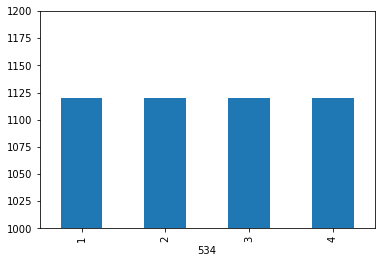

In [16]:
groups = sensors_data.groupby([534]).size()
plt.axis([0, 4, 1000, 1200])
groups.plot.bar()

### Classification

There are numerous types of classifiers and in this paper four of them were compared:
<ol>
    <li>Least Squares Linear Classifier (LSLC)</li>
    <li>Least Squares Quadratic Classifier (LSQC)</li>
    <li>Support Vector Machines</li>
    <li>Multi-Layer Perceptrons</li>
    <li>k-Nearest Neighbor</li>
    <li>Centroid Displacement-Based k-Nearest Neighbors</li>
    <li>Random Forests</li>
</ol>

### Feature Selection

The main goals with this feature selection are:
<ul>
    <li>Reduce the generalization problems by reducing overfitting and to simplify the model.</li> 
    <li>Minimize the error rate of a predetermined classification algorithm.</li>
    <li>Seek the best reduced set of features which are able to obtain the minimum error probability of a classifier.</li>
</ul>
It is used Genetic algorithms (GAs) that are a method for solving both constrained and unconstrained optimization problems based on a natural selection process that mimics biological evolution so they can be successfully applied to the problem of feature selection.
GA seems to be very useful in order to select the most relevant features, improving the results in terms of both complexity after training and error rate.    
In order to do a very fast learning process is required so Use Least Squares Linear Classifier (LSLC) and to avoid overfitting in the results so use k-fold cross-validation.

## Results and Analysis

### Window Length Selection

The first parameter to determine is the window length. There were considered windows of 10s, 20s, 40s and 60s. To determine which window lengths was the most appropriate to extract the features, a number of experiments were carried out using the simplest of the classifiers - Least Squares Linear Classifier (LSLC) - The results (presented in the table) indicate that in case of using all the signals, the best result is obtained with a window length of 40s. For that reason, the authors, fixed the window length to that value. 

### Classifier Selection

To select the best classifier, there were trained the different types of classifiers with different combinations of signals, and a different number of maximum features to be selected.
As we can see from this table on the left, the best combination of signals is the case including all the physiological signals (ECG+TEB+EDA) with a max of 40 features, obtaining a 22.2% of error rate for LSLC classifier.
It was also studied the main differences in the identification of the activity. The confusion matrix shown indicates the misclassification between classes obtained using the LSLC classifier and Nmax of 40 features obtained from all 3 signals (ECG+TEB+EDA), where the classes that present more misclassification are emotional and mental activity.
In case of considering just one signal the best choice is the use of the TEB. In this case the results are somewhat different from the previous ones, since the classifier that gives the best results is the RF.


### Frequently Selected Features

With Genetic Algorithms it was found the top-40 selected features. 
The three best combinations of signals were: 
<ul>
    <li>TEB alone</li>
    <li>TEB and the ECG</li>
    <li>using all the biosignals</li>
</ul>
It is identifiable that mean baseline is the most common parameter.



## Conclusions and discussion
<ol>
    <li> Evaluation of the classification performance of different sensing modes ECG, TEB and EDA for detection of 4 different activities </li>
    <li> Evaluation from: </li>
    <ol> 
        <li> the sensing mode perspective,</li>        
        <li> the type of activity targeted,</li>
        <li> other parameters related to the feature extraction and classifier training.</li>
    </ol>
    <li>Window length of 40 s</li>
    <li>Using GA 533 features -> 40 features</li>
    <li>Easily identifiable activity: Physical > Neutral > Emotional > Mental</li>
    <li>How to better the results:</li>
    <ol>
        <li>Use different and better electronic devices</li>
        <li>More extensive database</li>
    </ol>
</ol>


# Practical Analysis

To do a practical demonstration on the use of the dataset and the information gotten from the paper we decided to train some classifiers, that were also used by the authors, and check not also the results of the predictions but also the values from the classification report.

## Preprocessing

The features selected to be used on the training are most of the ones presented on the **Table 4.** of the paper, which contains the Top 40 features that the Genetic Algorithm chooses. This is done so the time of processing, using all the features, is not exaggerated. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix


relevant_columns = [78, 29, 174, 221, 235, 229, 340, 354, 57, 81, 43, 472, 319, 291, 490, 486, 263, 277, 6, 40, 
                    185, 26, 448, 452, 451, 19, 18, 200, 204, 219, 322, 324, 189, 320, 449, 42]
X = sensors_data[relevant_columns] 
y = sensors_data[534]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

(4480, 36)



### Linear SVM, using a One vs All Aproach

We trained the **SVM**, using a **Linear Kernel**, and a **One vs All aproach**, indicated by the authors in the results of the paper.

In [3]:
svclassifier = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[3 2 3 3 4 4 2 3 2 3 2 1 1 4 1 1 3 4 1 4 4 3 1 1 2 4 2 4 3 3 2 2 3 3 4 1 1
 4 1 2 4 4 4 3 2 2 4 4 3 2 1 3 4 2 2 2 1 4 4 4 3 2 3 2 4 1 4 2 3 3 2 1 4 2
 4 4 3 3 3 4 1 1 3 2 3 4 1 4 4 1 2 1 1 4 2 3 3 1 3 4 1 2 3 3 2 3 2 2 3 1 3
 4 4 3 1 1 1 4 1 1 4 2 1 2 3 4 3 3 4 4 4 3 3 1 3 4 2 4 4 3 4 4 4 4 1 4 1 3
 3 4 2 1 3 1 2 2 2 4 2 4 4 1 3 4 2 1 4 4 3 1 2 3 2 1 2 3 4 1 2 4 3 3 3 2 2
 1 1 1 3 3 1 3 4 1 3 4 3 1 4 3 4 3 3 1 2 4 4 3 3 1 3 3 1 3 3 1 3 4 3 2 1 3
 1 3 4 4 2 2 4 1 3 1 2 4 2 1 4 2 2 3 1 4 3 2 2 4 4 4 2 1 3 4 3 1 4 4 4 2 2
 2 3 1 4 2 2 2 2 4 4 1 1 2 4 3 4 4 4 3 4 2 4 1 4 3 4 1 3 1 1 4 3 1 1 3 3 2
 4 1 2 3 1 4 3 2 2 3 4 1 1 3 2 4 1 1 2 4 4 3 4 2 4 3 1 3 2 3 3 3 3 3 1 4 1
 2 4 3 2 4 2 1 3 4 3 1 2 3 3 2 4 3 4 1 1 1 1 3 1 3 1 1 3 1 4 3 3 3 3 3 4 2
 1 4 3 1 2 3 1 3 2 3 3 1 4 1 3 2 4 1 3 3 4 3 4 4 1 4 3 1 4 3 1 4 1 4 3 1 3
 4 3 1 1 2 1 4 1 3 4 4 1 1 1 3 3 1 1 3 3 4 2 3 4 3 3 2 3 3 2 1 3 4 2 2 2 4
 2 1 3 3 3 4 1 1 4 1 3 4 4 1 1 3 1 3 4 3 3 3 2 1 4 4 2 3 4 2 2 4 4 1 1 1 2
 3 4 4 2 2 3 3 4 3 2 2 4 

For the physical and neutral activity the precision was very high, that was already stated in the results and conclusions of the paper. 

### Random Forest

**Random forest** builds multiple decision trees and merges them together to get a more accurate and stable prediction.
Because the authors used **Random Forest** as one of their classifiers, to try it out and do the tests ourselves we used the same set of features, of the last example with the SVM, to it.

A total of **T = 200** trees were used to generate each RF classifier as it was stated in the paper by the authors.

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=200, max_features='log2', oob_score=False)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143  44  31   3]
 [  0 147  71  16]
 [  3  73 116  20]
 [  0   5   4 220]]
              precision    recall  f1-score   support

           1       0.98      0.65      0.78       221
           2       0.55      0.63      0.58       234
           3       0.52      0.55      0.53       212
           4       0.85      0.96      0.90       229

    accuracy                           0.70       896
   macro avg       0.72      0.70      0.70       896
weighted avg       0.73      0.70      0.70       896

